In [ ]:
filter_conductivity_path = r"D:\deep\GNN\pre_train_sse\dhw\Filtered\1251"

1，filter_conductivity_path中包含很多类似 "agm003175673_KLiCl2_300.png"的文件，其中"agm003175673"是mp_id，"KLiCl2"是元素，"300"是温度。

我们需要你读取所有的文件，提取出mp_id和温度，并生成一个字典，字典的键是mp_id，值是一个{
        "formula": "KLiCl2"}

2，基于得到的 mp_id 去匹配 './Filter_cifs_1251'路径下的.cif文件，将匹配到的.cif文件copy到 './Filter_cifs_77'路径下。
'./Filter_cifs_1251'路径下的cif文件名为 "agm001017762_LiNF.cif"格式。

请完成代码

In [1]:
import os
import shutil
import re

# 1. 读取所有的文件，提取出mp_id和温度，并生成一个字典
filter_conductivity_path = r"D:\deep\GNN\pre_train_sse\dhw\Filtered\1251"
cif_source_path = r"./Filter_cifs_1251"
cif_target_path = r"./Filter_cifs_77"

# 确保目标文件夹存在
os.makedirs(cif_target_path, exist_ok=True)

# 正则表达式匹配文件名中的mp_id, formula和temperature
pattern = re.compile(r"(\w+)_(\w+)_(\d+)\.png")

# 初始化字典
data_dict = {}

# 遍历filter_conductivity_path中的所有文件
for filename in os.listdir(filter_conductivity_path):
    match = pattern.match(filename)
    if match:
        mp_id, formula, temperature = match.groups()
        data_dict[mp_id] = {"formula": formula}

# 2. 基于得到的mp_id去匹配.cif文件，将匹配到的.cif文件copy到目标路径下
# 更新正则表达式以匹配cif文件名格式
cif_pattern = re.compile(r"(\w+)_.+\.cif")

# 遍历cif_source_path中的所有文件
for cif_filename in os.listdir(cif_source_path):
    cif_match = cif_pattern.match(cif_filename)
    if cif_match:
        cif_mp_id = cif_match.group(1)
        if cif_mp_id in data_dict:
            source_cif_path = os.path.join(cif_source_path, cif_filename)
            target_cif_path = os.path.join(cif_target_path, cif_filename)
            
            if os.path.exists(source_cif_path):
                shutil.copy(source_cif_path, target_cif_path)
                print(f"Copied {cif_filename} to {cif_target_path}")
            else:
                print(f"File {cif_filename} not found in {cif_source_path}")

Copied agm003175673_KLiCl2.cif to ./Filter_cifs_77
Copied agm003214325_Li2MgBr4.cif to ./Filter_cifs_77
Copied agm003228114_Li4B2O5.cif to ./Filter_cifs_77
Copied agm003282144_Li7SiPO8.cif to ./Filter_cifs_77
Copied agm003424322_KLi2Cl3.cif to ./Filter_cifs_77
Copied agm003448555_Li2MgCl4.cif to ./Filter_cifs_77
Copied agm003450191_Li2MgBr4.cif to ./Filter_cifs_77
Copied agm003452832_SrLi2Br4.cif to ./Filter_cifs_77
Copied agm003542573_Li3BO3.cif to ./Filter_cifs_77
Copied agm003555939_Rb3LiBr4.cif to ./Filter_cifs_77
Copied agm003568530_Li3ScBr6.cif to ./Filter_cifs_77
Copied agm003579462_Li3YBr6.cif to ./Filter_cifs_77
Copied agm003652386_Li5Cl4F.cif to ./Filter_cifs_77
Copied agm003709013_LiCaCl3.cif to ./Filter_cifs_77
Copied agm003720401_SrLiBr3.cif to ./Filter_cifs_77
Copied agm003733871_LiLaBr4.cif to ./Filter_cifs_77
Copied agm003733874_LiPrBr4.cif to ./Filter_cifs_77
Copied agm003734479_LiYCl4.cif to ./Filter_cifs_77
Copied agm003736575_LiNdCl4.cif to ./Filter_cifs_77
Copied a

In [3]:
import os
import shutil
import re
import json

# 3. 保存 data_dict 为 Filter_cifs_76.json
with open("Filter_cifs_76.json", "w") as json_file:
    json.dump(data_dict, json_file, indent=4)
    print("data_dict saved as Filter_cifs_76.json")

data_dict saved as Filter_cifs_76.json


In [4]:
# conductivity_1251_path = r"D:\deep\GNN\pre_train_sse\dhw\Filtered\1251\conductivity.csv"
# 1,读取 conductivity_1251_path 文件，其column为：

# 'ids': ids,
# 'formula': formula,
# 'temperature': temperature,
# 'conductivity': conductivity

# 2,按照 data_dict中的 mp_id 匹配.csv文件中的 ids，将匹配成功的数据写入到新的文件中。
# 更新到 Filter_cifs_76.json中

import pandas as pd

# 4. 读取 conductivity_1251_path 文件
conductivity_1251_path = r"D:\deep\GNN\pre_train_sse\dhw\Filtered\1251\conductivity.csv"

# 读取CSV文件
df = pd.read_csv(conductivity_1251_path)

# 5. 按照 data_dict 中的 mp_id 匹配 .csv 文件中的 ids
matched_data = df[df['ids'].isin(data_dict.keys())]

# 6. 将匹配成功的数据写入到新的文件中
matched_data.to_csv("matched_conductivity.csv", index=False)
print("Matched data saved as matched_conductivity.csv")

# 7. 更新 Filter_cifs_76.json 文件，包含匹配成功的数据
for index, row in matched_data.iterrows():
    mp_id = row['ids']
    if mp_id in data_dict:
        data_dict[mp_id].update({
            "temperature": row['temperature'],
            "conductivity": row['conductivity']
        })

# 8. 保存更新后的 data_dict 到 Filter_cifs_76.json
with open("Filter_cifs_76.json", "w") as json_file:
    json.dump(data_dict, json_file, indent=4)
    print("Updated data_dict saved as Filter_cifs_76.json")

Matched data saved as matched_conductivity.csv
Updated data_dict saved as Filter_cifs_76.json


In [8]:
# 第一，从 D:\deep\GNN\SSE\alexandria-PBE_filter\conductivity125.csv读取 .csv文件，其中的columname = ['ids', 'formula', 'temperature', 'conductivity']

# 第二，读取 file_name = r'D:\deep\GNN\SSE\alexandria-PBE_filter\plot\1251_filtered_6_band_gap_red_oxi_add_bulk_shear_Lanthanide_elastic_100Gpa.json'
# with open(file_name, 'r') as f:
#     data = json.load(f)

# 第三，根据 第一步得到 csv文件的 'ids' 得到所有的ids，然后基于这些ids，得到 第二步得到的 data['ids']对应的数据，保存为 filter_125.json

import pandas as pd
import json

# 第一步：读取 CSV 文件
csv_file_path = r'D:\deep\GNN\SSE\alexandria-PBE_filter\conductivity125.csv'
df = pd.read_csv(csv_file_path)

# 获取所有的 ids
ids_list = df['ids'].tolist()

# 第二步：读取 JSON 文件
json_file_path = r'D:\deep\GNN\SSE\alexandria-PBE_filter\filtered_6_band_gap_red_oxi_add_bulk_shear_Lanthanide_elastic_100Gpa.json'
with open(json_file_path, 'r') as f:
    data = json.load(f)

# 第三步：根据 CSV 文件的 ids 提取 JSON 文件中对应的数据
filtered_data = {mp_id: data[mp_id] for mp_id in ids_list if mp_id in data}

# 保存为 filter_125.json
output_json_path = r'D:\deep\GNN\SSE\alexandria-PBE_filter\filter_125.json'
with open(output_json_path, 'w') as f:
    json.dump(filtered_data, f, indent=4)

print(f"Filtered data saved as {output_json_path}")

Filtered data saved as D:\deep\GNN\SSE\alexandria-PBE_filter\filter_125.json


In [ ]:
第一，从 D:\deep\GNN\SSE\alexandria-PBE_filter\conductivity125.csv读取 .csv文件，其中的columname = ['ids', 'formula', 'temperature', 'conductivity']

第二，读取 file_name = r'D:\deep\GNN\SSE\alexandria-PBE_filter\plot\1251_filtered_6_band_gap_red_oxi_add_bulk_shear_Lanthanide_elastic_100Gpa.json'
with open(file_name, 'r') as f:
    data = json.load(f)

第三，根据 第一步得到 csv文件的 'ids' 得到所有的ids，然后基于这些ids，得到 第二步得到的 data['ids']对应的数据，数据格式为
"agm006016489": {
        "energy_total": -37.43778476,
        "cif": "",
        "e_above_hull": 0.083532006,
        "spg": 2,
        "band_gap_ind": 3.0207,
        "band_gap_dir": 3.0724,
        "correction": -1.240000003122077e-06, # type: ignore
        "formula": "Li3ScBr6",
        "total_mag": 0.0,
        "dos_ef": 0.0,
        "energy_corrected": -37.437786,
        "e_form": -1.532752,
        "composition": {
            "Li": 3.0,
            "Sc": 1.0,
            "Br": 6.0
        },
        "reduction_potential": 0.9134752283333338,
        "oxidation_potential": 3.671789068333333,
        "electrochemical_stability_window": 2.7583138399999996,
        "bulk_modulus": 11.926806449890137,
        "shear_modulus": 7.430861473083496
    },
利用 下面代码对data['ids']中的 formula 判断其class，
# 定义判断材料类别的函数
def classify_material(composition):
    halides = ['F', 'Cl', 'Br', 'I']
    oxides = ['O']
    sulfides = ['S']
    
    if any(halide in composition for halide in halides):
        return 'Halides'
    elif 'O' in composition:
        return 'Oxides'
    elif 'S' in composition or 'Se' in composition:
        return 'Sulfides'
    else:
        return 'Others'

# 应用分类函数到 Composition 列，并创建新的 class 列
df['class'] = df['formula'].apply(classify_material)


将这些数据 按照下面的 columns对应保存，例如 "formula"对应 Composition，"e_above_hull"对应 Ehull，
"band_gap_ind"对应 Band gap (eV)，
"reduction_potential"对应 Ered，"oxidation_potential"对应 Eox，"bulk_modulus"对应 Bulk modulus (Gpa)，"shear_modulus"对应 Shear modulus (Gpa)，
conductivity125中本身 的 conductivity 值对应 'conductivity_300K',



(['ID', 'Composition', 'Space group', 'Ehull',
       'Band gap (eV)', 'Ered', 'Eox', 'Bulk modulus (Gpa)',
       'Shear modulus (Gpa)', 'conductivity_300K', 'class'],
      dtype='object')
最后保存为 filter_125.xlsx

In [10]:
import pandas as pd
import json

# 第一步：读取 CSV 文件
csv_file_path = r'D:\deep\GNN\SSE\alexandria-PBE_filter\conductivity125.csv'
df = pd.read_csv(csv_file_path)

# 获取所有的 ids
ids_list = df['ids'].tolist()

# 第二步：读取 JSON 文件
json_file_path = r'D:\deep\GNN\SSE\alexandria-PBE_filter\filtered_6_band_gap_red_oxi_add_bulk_shear_Lanthanide_elastic_100Gpa.json'
with open(json_file_path, 'r') as f:
    data = json.load(f)

# 第三步：根据 CSV 文件的 ids 提取 JSON 文件中对应的数据
filtered_data = {mp_id: data[mp_id] for mp_id in ids_list if mp_id in data}

# 创建一个新的 DataFrame 来保存最终的数据
final_data = []

# 定义判断材料类别的函数
def classify_material(formula):
    halides = ['F', 'Cl', 'Br', 'I']
    oxides = ['O']
    sulfides = ['S']
    
    if any(halide in formula for halide in halides):
        return 'Halides'
    elif 'O' in formula:
        return 'Oxides'
    elif 'S' in formula or 'Se' in formula:
        return 'Sulfides'
    else:
        return 'Others'

# 遍历 filtered_data 并提取需要的字段
for mp_id, entry in filtered_data.items():
    formula = entry.get("formula")
    spg = entry.get("spg")
    ehull = entry.get("e_above_hull")
    band_gap = entry.get("band_gap_ind")
    ered = entry.get("reduction_potential")
    eox = entry.get("oxidation_potential")
    bulk_modulus = entry.get("bulk_modulus")
    shear_modulus = entry.get("shear_modulus")
    conductivity_300K = df[df['ids'] == mp_id]['conductivity'].values[0]
    material_class = classify_material(formula)
    
    final_data.append({
        'ID': mp_id,
        'Composition': formula,
        'Space group': spg,
        'Ehull': ehull,
        'Band gap (eV)': band_gap,
        'Ered': ered,
        'Eox': eox,
        'Bulk modulus (Gpa)': bulk_modulus,
        'Shear modulus (Gpa)': shear_modulus,
        'conductivity_300K': conductivity_300K,
        'class': material_class
    })

# 将最终数据保存为 DataFrame
final_df = pd.DataFrame(final_data)

# 保存为 filter_125.xlsx
output_excel_path = r'D:\deep\GNN\SSE\alexandria-PBE_filter\filter_125.xlsx'
final_df.to_excel(output_excel_path, index=False)

print(f"Filtered data saved as {output_excel_path}")

Filtered data saved as D:\deep\GNN\SSE\alexandria-PBE_filter\filter_125.xlsx


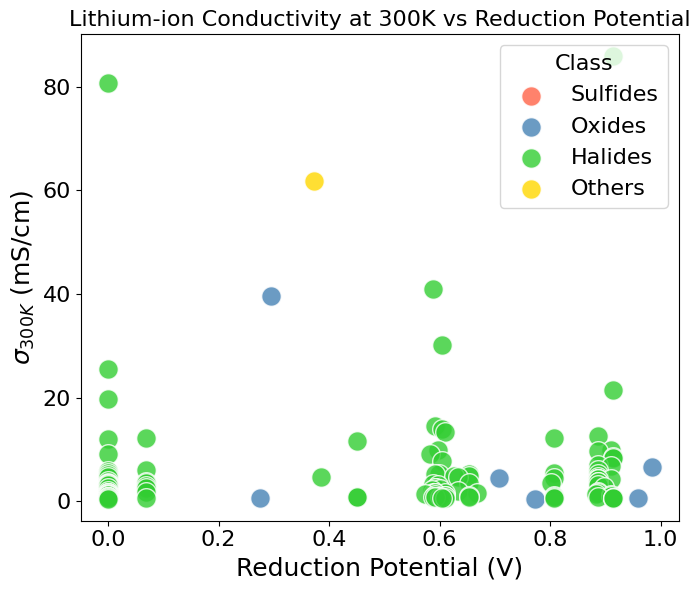

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置Seaborn样式
# sns.set(style="whitegrid", context="talk")

# 读取CSV文件
file_path = 'filter_125.xlsx'
data = pd.read_excel(file_path)

# 定义类别和对应的颜色
class_colors = {
    'Sulfides': '#FF6347',  # 橙红色
    'Oxides': '#4682B4',    # 钢蓝色
    'Halides': '#32CD32',    # 森林绿色
    'Others': '#FFD700',  # 金色
    # 'Nitrides': '#FF69B4',   # 粉红色
    # 'Sulfosalts': '#FFA500', # 橙色
    # 'Nitrites': '#00BFFF',   # 青色
    # 'Nitrates': '#8B4513',   # 棕色
    # 'Nitrites': '#FFA500',   # 橙色
}

# 创建散点图
plt.figure(figsize=(7, 6))
for class_label, color in class_colors.items():
    subset = data[data['class'] == class_label]
    plt.scatter(subset['Ered'], subset['conductivity_300K'], color=color, label=class_label, alpha=0.8, edgecolors='w', s=200)

# 添加图例
plt.legend(title='Class', fontsize=16, title_fontsize=16, loc='upper right')

# 添加标题和标签
plt.title('Lithium-ion Conductivity at 300K vs Reduction Potential', fontsize=16)
plt.xlabel('Reduction Potential (V)', fontsize=18)
plt.ylabel(r'$\sigma_{300K}$ (mS/cm)', fontsize=18)  # 使用LaTeX格式设置下标

# 设置刻度字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# 调整子图间距
plt.tight_layout()
output_image_path = './plot/125/Reduction_conductivity_125.png'
# 保存图片
plt.savefig(output_image_path, dpi=300)
# 显示图形
plt.show()

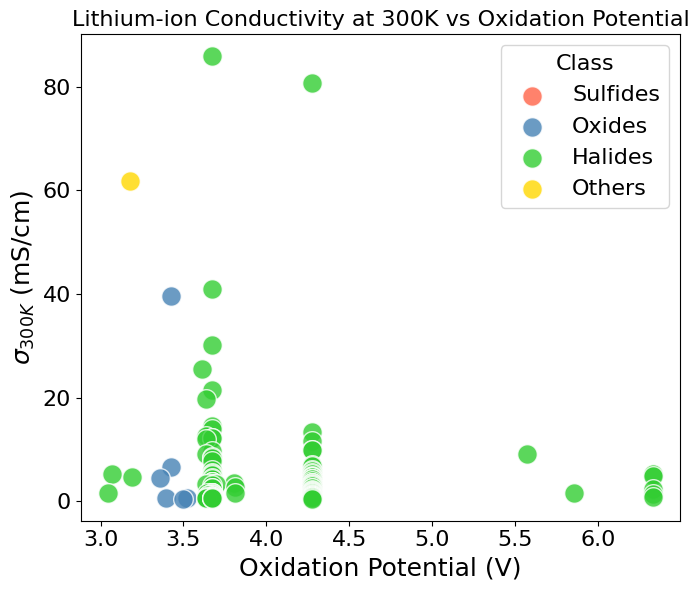

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置Seaborn样式
# sns.set(style="whitegrid", context="talk")

# 读取CSV文件
file_path = 'filter_125.xlsx'
data = pd.read_excel(file_path)

# 定义类别和对应的颜色
class_colors = {
    'Sulfides': '#FF6347',  # 橙红色
    'Oxides': '#4682B4',    # 钢蓝色
    'Halides': '#32CD32',    # 森林绿色
    'Others': '#FFD700',  # 金色
    # 'Nitrides': '#FF69B4',   # 粉红色
    # 'Sulfosalts': '#FFA500', # 橙色
    # 'Nitrites': '#00BFFF',   # 青色
    # 'Nitrates': '#8B4513',   # 棕色
    # 'Nitrites': '#FFA500',   # 橙色
}

# 创建散点图
plt.figure(figsize=(7, 6))
for class_label, color in class_colors.items():
    subset = data[data['class'] == class_label]
    plt.scatter(subset['Eox'], subset['conductivity_300K'], color=color, label=class_label, alpha=0.8, edgecolors='w', s=200)

# 添加图例
plt.legend(title='Class', fontsize=16, title_fontsize=16)

# 添加标题和标签
plt.title('Lithium-ion Conductivity at 300K vs Oxidation Potential', fontsize=16)
plt.xlabel('Oxidation Potential (V)', fontsize=18)
plt.ylabel(r'$\sigma_{300K}$ (mS/cm)', fontsize=18)  # 使用LaTeX格式设置下标

# 设置刻度字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# 调整子图间距
plt.tight_layout()
output_image_path = './plot/125/Oxidation_conductivity_125.png'
# 保存图片
plt.savefig(output_image_path, dpi=300)
# 显示图形
plt.show()

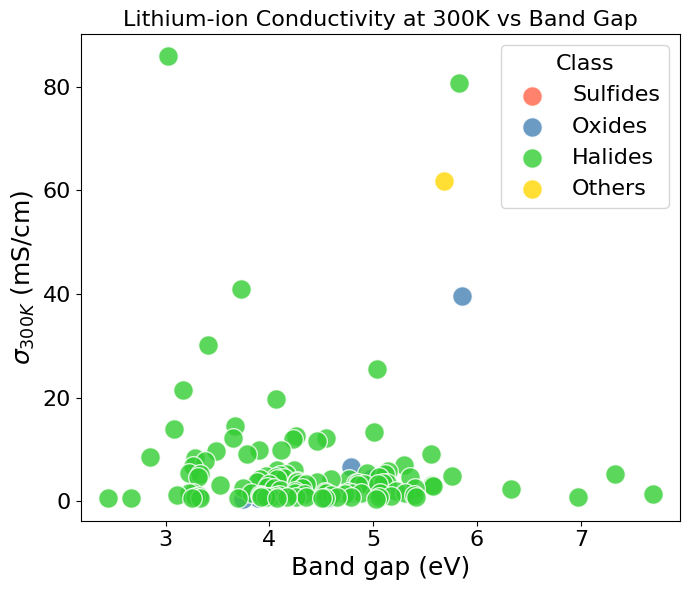

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置Seaborn样式
# sns.set(style="whitegrid", context="talk")

# 读取CSV文件
file_path = 'filter_125.xlsx'
data = pd.read_excel(file_path)

# 定义类别和对应的颜色
class_colors = {
    'Sulfides': '#FF6347',  # 橙红色
    'Oxides': '#4682B4',    # 钢蓝色
    'Halides': '#32CD32',    # 森林绿色
    'Others': '#FFD700',  # 金色
    # 'Nitrides': '#FF69B4',   # 粉红色
    # 'Sulfosalts': '#FFA500', # 橙色
    # 'Nitrites': '#00BFFF',   # 青色
    # 'Nitrates': '#8B4513',   # 棕色
    # 'Nitrites': '#FFA500',   # 橙色
}

# 创建散点图
plt.figure(figsize=(7, 6))
for class_label, color in class_colors.items():
    subset = data[data['class'] == class_label]
    plt.scatter(subset['Band gap (eV)'], subset['conductivity_300K'], color=color, label=class_label, alpha=0.8, edgecolors='w', s=200)

# 添加图例
plt.legend(title='Class', fontsize=16, title_fontsize=16, loc='upper right')

# 添加标题和标签
plt.title('Lithium-ion Conductivity at 300K vs Band Gap', fontsize=16)
plt.xlabel('Band gap (eV)', fontsize=18)
plt.ylabel(r'$\sigma_{300K}$ (mS/cm)', fontsize=18)  # 使用LaTeX格式设置下标

# 设置刻度字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# 调整子图间距
plt.tight_layout()
output_image_path = './plot/125/Bandgap_conductivity.png'
# 保存图片
plt.savefig(output_image_path, dpi=300)
# 显示图形
plt.show()

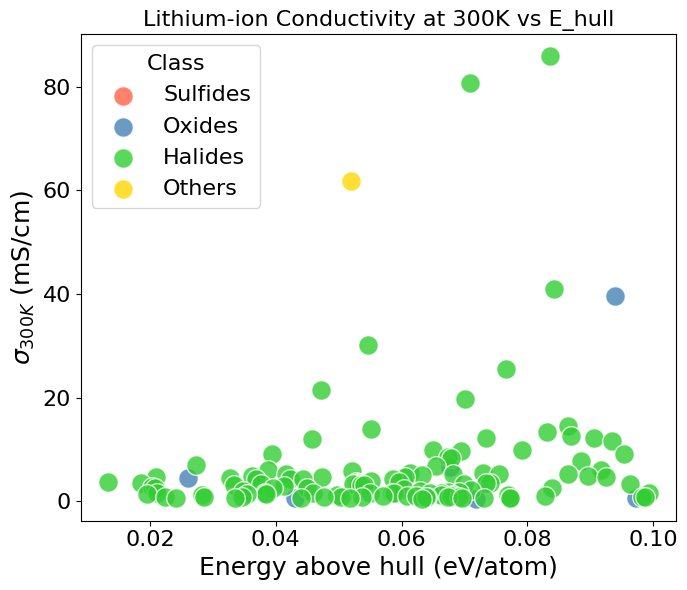

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置Seaborn样式
# sns.set(style="whitegrid", context="talk")

# 读取CSV文件
file_path = 'filter_125.xlsx'
data = pd.read_excel(file_path)

# 定义类别和对应的颜色
class_colors = {
    'Sulfides': '#FF6347',  # 橙红色
    'Oxides': '#4682B4',    # 钢蓝色
    'Halides': '#32CD32',    # 森林绿色
    'Others': '#FFD700',  # 金色
    # 'Nitrides': '#FF69B4',   # 粉红色
    # 'Sulfosalts': '#FFA500', # 橙色
    # 'Nitrites': '#00BFFF',   # 青色
    # 'Nitrates': '#8B4513',   # 棕色
    # 'Nitrites': '#FFA500',   # 橙色
}

# 创建散点图
plt.figure(figsize=(7, 6))
for class_label, color in class_colors.items():
    subset = data[data['class'] == class_label]
    plt.scatter(subset['Ehull'], subset['conductivity_300K'], color=color, label=class_label, alpha=0.8, edgecolors='w', s=200)

# 添加图例
plt.legend(title='Class', fontsize=16, title_fontsize=16)

# 添加标题和标签
plt.title('Lithium-ion Conductivity at 300K vs E_hull', fontsize=16)
plt.xlabel('Energy above hull (eV/atom)', fontsize=18)
plt.ylabel(r'$\sigma_{300K}$ (mS/cm)', fontsize=18)  # 使用LaTeX格式设置下标

# 设置刻度字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# 调整子图间距
plt.tight_layout()
output_image_path = './plot/125/Ehull_conductivity.png'
# 保存图片
plt.savefig(output_image_path, dpi=300)
# 显示图形
plt.show()

In [12]:
import json
from pymatgen.io.cif import CifParser
from pymatgen.core.structure import Structure

# 读取 li_sse_gap_mp_datasest.json 文件
file_name = r'D:\deep\GNN\SSE\alexandria-PBE_filter\filter_125.json'
with open(file_name, 'r') as f:
    data = json.load(f)

# 提取所有的 material_id
all_material_id = list(data.keys())

# 初始化结果字典
all_mp_datasest = {
    "index": all_material_id,
    'columns': ['structure', 'electrochemical_stability_window',"band_gap_ind", "bulk_modulus", "shear_modulus"],
    'data': []
}

# 遍历每个 material_id
for material_id in all_material_id:
    try:
        # 获取 cif 和 band_gap
        cif = data[material_id].get('cif')
        window = data[material_id].get('electrochemical_stability_window')
        gap = data[material_id].get('band_gap_ind')
        bulk_modulus = data[material_id].get('bulk_modulus')
        shear_modulus = data[material_id].get('shear_modulus')
        if cif:
            # 将 cif 转换为 pymatgen.Structure 对象, 将 Structure 对象转换为字典
            pymatgen_structure_dict = Structure.from_str(cif,fmt='cif').as_dict()
        else:
            pymatgen_structure_dict = None

        # 将结果添加到 data 列表中
        all_mp_datasest['data'].append([pymatgen_structure_dict,window, gap, bulk_modulus, shear_modulus])
    except Exception as e:
        print(f"Error processing material {material_id}: {e}")

# 保存为新的 li_sse_gap_mp_datasest.json 文件
output_file_name = './plot/filter_125.json'
with open(output_file_name, 'w') as f:
    json.dump(all_mp_datasest, f, indent=4)

print(f"Data saved to {output_file_name}")

Data saved to ./plot/filter_125.json


In [ ]:
import json
import os

# 文件路径
filtered_data_path = r'D:\deep\GNN\SSE\alexandria-PBE_filter\filter_125.json'
output_folder = r'Filter_cifs_1251'

# 确保输出文件夹存在，如果不存在则创建
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 读取 filtered_data_elastic.json 文件
with open(filtered_data_path, 'r') as f:
    filtered_data_elastic = json.load(f)

# 遍历每个 id，提取 cif 字段并保存为 cif 文件
for mp_id, entry in filtered_data_elastic.items():
    cif_content = entry.get("cif")
    formula_pretty = entry.get("formula")
    
    if cif_content and formula_pretty:
        # 构建文件名
        file_name = f"{mp_id}_{formula_pretty}.cif"
        file_path = os.path.join(output_folder, file_name)
        
        # 保存 cif 内容到文件
        with open(file_path, 'w') as f:
            f.write(cif_content)
        
        print(f"Saved CIF file: {file_path}")
    else:
        print(f"Skipping entry {mp_id} due to missing cif or formula_pretty field.")